# Computer Assignment #0
In this project, we wish to fill out the missing CO2 emissions from a dataset containing the data for different car models and get started with some of the most useful libraries when dealing with data processing namely pandas, numpy and matplotlib as well as Jupyter Notebook along the way. 
We were given a file containing the data for different car models and were expected to estimate the CO2 emissions for each car model. Each record in this dataset has the following information: year of manufacture, make, model, vehicle class, engine size, number of cylinders, transmission type, fuel type, feul consumption within city, feul consumption in highways, feul consumption combined, feul consumption combined (miles per gallon) and Carbon Dioxide emissions. However, some of the records are missing their CO2 emission which is our target data. In order to fill out the missing data in the target column we should use the available data in other column of said records; By scanning the dataset and finding the property that is most likely to determine the CO2 emissions, we can find a simple linear regression model for the target value to help estimate the actual amount.
We are going to use the following libraries and modules to retrieve and analyze the given data: pandas, numpy, matplotlib.pyplot
##### Pandas
Pandas is a software library built on top of the Python programming language for data manipulation and analysis.In particular, it offers data structures and operations for manipulating numerical tables and time series.
##### NumPy
NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. In this assignment, we are going to take advantage of the NumPy vectorization, indexing, and broadcasting concepts and see how the performance improves.
##### matplotlib.pyplot 
matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure. In matplotlib.pyplot various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes.

## Project Description
We are equipped with the datasheet for 1000 users who were exposed to a particular ad. However some of the numbers in this datasheet is missing, including the boolean-typed data in "Clicked on Ad" column. First, we visualize the given data, using the pandas library, by calling the head, tail, and describe methods on our dataframe. Then we replace the missing data in each of the columns except the target column, with the average of that property. Now we normalize the data to further improve the data for machine learning, then we use the mean and std for each of the numerical properties of users and select an indicator that can determine and predict best whether a particular user has clicked on the ad or not and use this property as the predictor input.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

pd.options.mode.chained_assignment = None

# 1
In the following line of code we load the dataset provided in a csv file that contains the information of 1067 cars. We use the read_csv function that is exported from pandas library for this purpose. We store the returned data in a dataframe called "dataframe". In each row, the record of a car is presented with their data as following: MODELYEAR, MAKE, MODEL, VEHICLECLASS, ENGINESIZE, CYCLINDERS, TRANSMISSION, FUELTYPE, FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY, FUELCONSUMPTION_COMB, FUELCONSUMPTION_COMB_MPG and CO2EMISSIONS -aka the target data. However, some of the data is missing, marked as NaN by pandas library. We load this data in order to fill out the missing data in CO2 emission column.

In [2]:
dataframe = pd.read_csv("FuelConsumptionCo2.csv");

### head()
This method is used to get the first n rows of dataframe the default value of which is five, and as can be seen below by not specifying the number of rows to select, it returns the first 5 rows of the dataframe.

In [3]:
dataframe.head()

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,2014,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.9,6.7,8.5,33,196.0
1,1,2014,ACURA,ILX,COMPACT,2.4,4.0,M6,Z,11.2,7.7,9.6,29,221.0
2,2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,Z,6.0,5.8,5.9,48,136.0
3,3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,Z,12.7,9.1,11.1,25,NaN
4,4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,Z,12.1,8.7,10.6,27,244.0


### tail()
The tail() method, however, is used to get the last n rows of dataframe and the default value for this method is five like the head() method mentioned above. Below, we see the last 5 rows of the dataframe after calling the tail() method on said dataframe.

In [4]:
dataframe.tail()

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6.0,AS6,X,13.4,9.8,11.8,24,271.0
1063,1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6.0,AS6,X,13.2,9.5,11.5,25,264.0
1064,1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6.0,AS6,X,13.4,9.8,11.8,24,271.0
1065,1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6.0,AS6,X,12.9,9.3,11.3,25,260.0
1066,1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6.0,AS6,X,14.9,10.2,12.8,22,294.0


### describe()
The describe() method is used for calculating some statistical data like minimum and maximum value, percentile, mean and standard deviation of the numerical values in this case: MODELYEAR, ENGINESIZE, CYCLINDERS, FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY, FUELCONSUMPTION_COMB, FUELCONSUMPTION_COMB_MPG_ CO2EMISSIONS. Count represents the number of values in each column that are not null.

In [5]:
dataframe.describe()

,Unnamed: 0,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.0,1040.000000,1033.000000,1067.000000,1067.000000,1067.000000,1067.000000,964.000000
mean,533.000000,2014.0,3.324038,5.797677,13.296532,9.474602,11.580881,26.441425,256.741701
std,308.160672,0.0,1.411400,1.807262,4.101253,2.794510,3.485595,7.468702,63.265308
min,0.000000,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,266.500000,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,209.000000
50%,533.000000,2014.0,3.300000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,799.500000,2014.0,4.200000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,1066.000000,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,437.000000


# 2
### info()
Using the info() method, we get the following information about each of the columns: index, title, number of Non-null occurances and data type. The index column also known as Unnamed, MODELYEAR and FUELCONSUMPTION_COMB_MPG is of type int. ENGINESIZE, CYLINDERS, FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY, FUELCONSUMPTION_COMB and CO2EMISSIONS are of type float. All these columns have numerical values however the following columns are categorial: MAKE, MODEL, VEHICLECLASS, TRANSMISSION and FUELTYPE are of type object. We can also see at the bottom of the result, the total number of categories of type float, int and object. The memory usage us also specified which in this case takes up about 116.8 KB on disk.

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1067 non-null   int64  
 1   MODELYEAR                 1067 non-null   int64  
 2   MAKE                      1067 non-null   object 
 3   MODEL                     1058 non-null   object 
 4   VEHICLECLASS              1067 non-null   object 
 5   ENGINESIZE                1040 non-null   float64
 6   CYLINDERS                 1033 non-null   float64
 7   TRANSMISSION              1067 non-null   object 
 8   FUELTYPE                  996 non-null    object 
 9   FUELCONSUMPTION_CITY      1067 non-null   float64
 10  FUELCONSUMPTION_HWY       1067 non-null   float64
 11  FUELCONSUMPTION_COMB      1067 non-null   float64
 12  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 13  CO2EMISSIONS              964 non-null    float64
dtypes: float

We use label encoding for processing the non-numerical (categorial) values; we represent each of the values that belongs to a certain column using a number. In order to encode categorial values, we use label encoding. In other words, we convert each value in a column to a number. For instance, in the "FUELTYPE" column, we use 0 to 3 to represent values X, E, D and Z respectively. <br>
In order to do so, we define a dictionary to map each fuel type to its corresponding numerical value. Then we replace all the values in the FUELTYPE column of the dataframe with the mapped value. The replacement is done inplace meaning that the previous column is replaced in the original dataframe. <br>
After this recent modification, i.e. label encoding of the FUELTYPE, the dataframe.head() is called and thus the first 5 rows are displayed. By comparing the new values with original fuel types we see that "Z" is converted to 3.0 just like our mapping suggests. 

In [7]:
mapping = {"X": 0, "E": 1, "D": 2, "Z": 3}
dataframe["FUELTYPE"].replace(mapping, inplace = True)
dataframe.head()

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,2014,ACURA,ILX,COMPACT,2.0,4.0,AS5,3.0,9.9,6.7,8.5,33,196.0
1,1,2014,ACURA,ILX,COMPACT,2.4,4.0,M6,3.0,11.2,7.7,9.6,29,221.0
2,2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,3.0,6.0,5.8,5.9,48,136.0
3,3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,3.0,12.7,9.1,11.1,25,NaN
4,4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,3.0,12.1,8.7,10.6,27,244.0


# 3
The pandas library, presents the missing data in a cell using the NaN expression. So far, the describe() and info() method included the non-null count of each column as well as other parameters, however if we want to get the number of the null value in each of the column using vectorization we can do as following. <br>
The target column has the most number of missing data. This column aside, we still have a number of null values in MODEL, ENGINESIZE, CYLINDERS and FUELTYPE which are all of numerical type and therefore we can use the mean of the bunch to fill in the missing cells. Whereas, if some data in categorial columns were missing another approach had to be taken such as using the mode which is the value that appears most often in a set of data values.

In [8]:
dataframe.isnull().sum()

Unnamed: 0                    0
MODELYEAR                     0
MAKE                          0
MODEL                         9
VEHICLECLASS                  0
ENGINESIZE                   27
CYLINDERS                    34
TRANSMISSION                  0
FUELTYPE                     71
FUELCONSUMPTION_CITY          0
FUELCONSUMPTION_HWY           0
FUELCONSUMPTION_COMB          0
FUELCONSUMPTION_COMB_MPG      0
CO2EMISSIONS                103
dtype: int64

Now, we calculate the mean for each of the columns in the dataframe and store it in column_means. As for "MODEL" and "FUELTYPE", two categorial columns, that happens to have 9 and 71 rows with missing data respectively. In order to fill out these rows, we use the mode, the MODEL and encoded FUELTYPE with most frequency in this dataset. <br>
Also keep in mind that we do not want to replace the missing data in the target column with some arbitrary value such as mean, so we copy the last column. Then we use the fillna() method to replace the missing data in each column with the mean which we previously stored in column_means, then we revert the modified target column with its original value. <br>
Then we store the records with missing CO2 emission, in a separate dataframe called 'missing_df' by selecting the rows for which CO2EMISSION is null.
### Mean imputation (substitution): pros and cons 
Pros: Imputing the mean preserves the mean of the observed data.  So if the data are missing completely at random, the estimate of the mean remains unbiased and by imputing the mean, you are able to keep your sample size up to the full sample size. <br>
Cons: One of the downside of using mean to fill missing values, is that mean imputation has an impact on attributes variability. Replacing missing data by the mean of available data causes the population standard deviation to be underestimated -because they mostly reside somewhere between the middle, but may also obscure important features of the population from which the data were sampled. This leads to introducing a bias to our model. Another drawback is that mean imputation does not preserve the relationships among variables. Values that are imputed by a variable’s mean have, in general, a correlation of zero with other variables. Relationships between variables are therefore biased toward zero.

In [11]:
column_means = dataframe.mean(numeric_only=True)
last_column_copy = dataframe['CO2EMISSIONS'].copy()
dataframe['FUELTYPE'].fillna(dataframe['FUELTYPE'].mode()[0], inplace=True)
dataframe = dataframe.fillna(column_means)
dataframe['MODEL'].fillna(dataframe['MODEL'].mode()[0], inplace=True)
dataframe['CO2EMISSIONS'] = last_column_copy
missing_df = dataframe[dataframe['CO2EMISSIONS'].isnull()]
dataframe

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,2014,ACURA,ILX,COMPACT,2.0,4.0,AS5,3.0,9.9,6.7,8.5,33,196.0
1,1,2014,ACURA,ILX,COMPACT,2.4,4.0,M6,3.0,11.2,7.7,9.6,29,221.0
2,2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,3.0,6.0,5.8,5.9,48,136.0
3,3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,3.0,12.7,9.1,11.1,25,NaN
4,4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,3.0,12.1,8.7,10.6,27,244.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6.0,AS6,0.0,13.4,9.8,11.8,24,271.0
1063,1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6.0,AS6,0.0,13.2,9.5,11.5,25,264.0
1064,1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6.0,AS6,0.0,13.4,9.8,11.8,24,271.0
1065,1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6.0,AS6,0.0,12.9,9.3,11.3,25,260.0


Here, if we get the null count for the dataframe in question, we get the following result; No null value in any of the columns except the target column that still has 103 missing instances.

In [12]:
dataframe.isnull().sum()

Unnamed: 0                    0
MODELYEAR                     0
MAKE                          0
MODEL                         0
VEHICLECLASS                  0
ENGINESIZE                    0
CYLINDERS                     0
TRANSMISSION                  0
FUELTYPE                      0
FUELCONSUMPTION_CITY          0
FUELCONSUMPTION_HWY           0
FUELCONSUMPTION_COMB          0
FUELCONSUMPTION_COMB_MPG      0
CO2EMISSIONS                103
dtype: int64

# 4
Here, we want to retrieve the mean fuel consumption in city of cars with a CO2 emission of less than 240. The pandas package enables us to use boolean indexing to select the data from the dataframes using a boolean vector. 
In boolean indexing, we select subsets of data based on the actual values of the data in the data and not on their row/column labels or integer locations. <br>
So all we need to do is to use one expressions to filter the data and get a subset of cars with CO2EMISSIONS less than 240. We store the mean of FUELCONSUMPTION_CITY column for this subset in a variable called 'less_than_240'. To get the mean fuel consumption of cars with a CO2 emission of more than 300, we do the same exact thing except we get the mean of FUELCONSUMPTION_CITY column of records with CO2EMISSIONS more than 300 and store it in 'more_than_300'. 

In [13]:
start_time = time.time()
less_than_240 = dataframe["FUELCONSUMPTION_CITY"][(dataframe['CO2EMISSIONS'] < 240)].mean()
more_than_300 = dataframe["FUELCONSUMPTION_CITY"][(dataframe['CO2EMISSIONS'] > 300)].mean()
finish_time = time.time()
print("Cars with a CO2 emission less than 240, consume", less_than_240, "on average.")
print("Cars with CO2 emission more than 300, consume", more_than_300, "on average.")
(finish_time - start_time)*1000

Cars with a CO2 emission less than 240, consume 10.03781902552204 on average.
Cars with CO2 emission more than 300, consume 18.663255813953487 on average.


1.062154769897461

# 5
Now, we calculate the same result without vectorization. Instead we iterate through each row and check if the corresponding CO2EMISSION is lower than 240 or greater than 300 and if so increment the corresponding count variable by one and add the FUELCONSUMPTION_CITY value to sum variable. <br>
If we get the time before and after a computation takes place, we can calculate how long the calculation takes to complete. Note that both in the previous code block, using vectorization, and in this block, using a for-loop, we printed the results after getting finish time, so printing the output would not have any effect on the computation duration. <br>
Upon running the two blocks a few times, the average time using vectorization is 1.86s while the average time using for-loop is 54.25s which is a whopping 30 times higher. The reason for the difference is that when looping over an array or any data structure in Python, there’s a lot of overhead involved. Vectorized operations in numpy delegate the looping internally to highly optimized C and Fortran functions, making for cleaner and faster Python code.

In [14]:
start_time = time.time()
count_less_than_240 = 0
sum_less_than_240 = 0
count_more_than_300 = 0
sum_more_than_300 = 0
for i, row in dataframe.iterrows():
    if (row['CO2EMISSIONS'] < 240):
        count_less_than_240 += 1
        sum_less_than_240 += row["FUELCONSUMPTION_CITY"]
    elif (row['CO2EMISSIONS'] > 300):
        count_more_than_300 += 1
        sum_more_than_300 += row["FUELCONSUMPTION_CITY"]
less_than_240 = sum_less_than_240 / count_less_than_240
more_than_300 = sum_more_than_300 / count_more_than_300
finish_time = time.time()
print("Cars with a CO2 emission less than 240, consume", less_than_240, "on average.")
print("Cars with CO2 emission more than 300, consume", more_than_300, "on average.")
(finish_time - start_time)*1000

Cars with a CO2 emission less than 240, consume 10.037819025522042 on average.
Cars with CO2 emission more than 300, consume 18.663255813953487 on average.


54.03709411621094

# 6
We can visulaize the data distribution in any column using the hist() method on the dataframe and we will get the corresponding diagram for any column with numerical value. Now, here, if we use vectorization we get the result in a shorter period of time, but in order to get a closer lookat each graph, we plotted every numerical column separately after the following code block. <br>
By using histograms, we can get a brief yet informational representation of each category, the distribution of the cars, visualization for how concentrated the data really is and so on. <br>
From now on we only deal with numercial columns, therefore MAKE, MODEL, VEHICLECLASS, TRNASMISSION and even FUELTYPE that was mapped to integer values from 0 to 3 are dropped and the remaining data is save in a new dataframe. <br>
Furthermore, MODELYEAR was dropped despite the fact that year has numerical value. Since the standard deviation is calculated by taking the sum of the squared deviations from the mean, a zero standard deviation can only be possible when all the values of a variable are the same (all equal to the mean). In this case, those variables have no discriminative power so they can be removed from the analysis. They cannot improve any classification, clustering or regression task.

In [15]:
df = dataframe.drop(["MODELYEAR", "MAKE", "MODEL", "VEHICLECLASS", "TRANSMISSION", "FUELTYPE"], axis=1)

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'MODELYEAR'}>,
        <AxesSubplot:title={'center':'ENGINESIZE'}>],
       [<AxesSubplot:title={'center':'CYLINDERS'}>,
        <AxesSubplot:title={'center':'FUELTYPE'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_CITY'}>],
       [<AxesSubplot:title={'center':'FUELCONSUMPTION_HWY'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_COMB'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_COMB_MPG'}>],
       [<AxesSubplot:title={'center':'CO2EMISSIONS'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

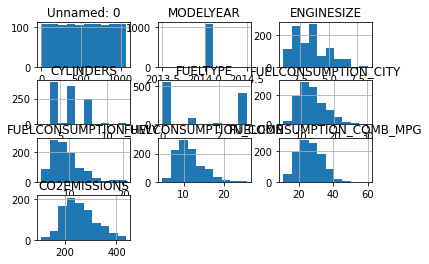

In [16]:
dataframe.hist()

The histograms of each numerical column is displayed below. <br>
MODELYEAR: As is clear, all the 1067 cars are produced in 2014. Thus, for this column we see that all the data is focused in one bar with the value of 2014. <br>
ENGINESIZE: engine size in this dataset has a value between 1 and 8. Therefore the bar starting at 1 to 2 represents the number of cars with 1 < engine size < 2. We can see that there are no cars with an engine size between 7 and 8. <br>
CYLINDERS: All the cars in this dataset can have 3, 4, 5, 6, 8, 10 or 12 cylinders. Therefore, we see 7 rectangle bars with these values on the x-axis and the majority of cars, a little over 400 actually, have 4 cylinders. <br>
FUELTYPE: We previouly label encoded this column with integer values in the range of 0 to 3. Here we see 4 major columns on 0, 1, 2 and 3 as expected with fuel type of 0 formerly known as X. <br>
FUELCONSUMPTION: All the fuel consumption columns have a common pattern which is described as follows. The majority of cars fall between the first and third quartile. The mode is also a value between first quartile and median. 

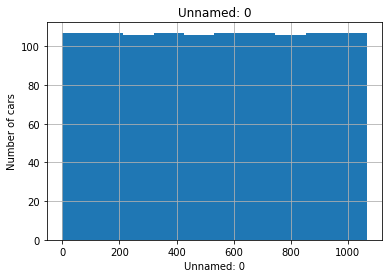

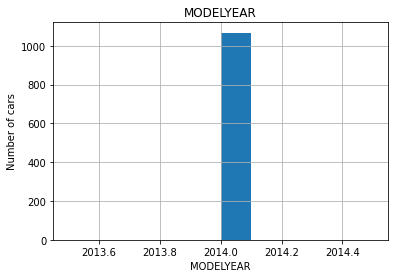

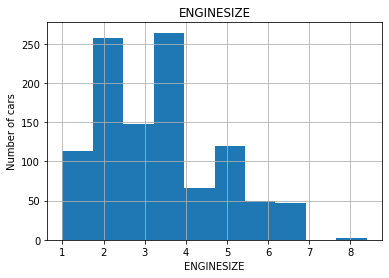

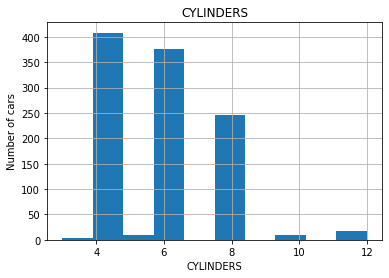

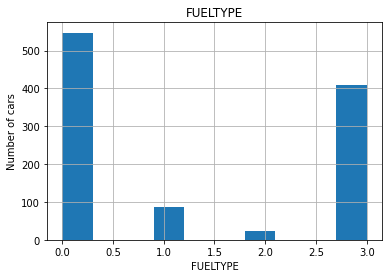

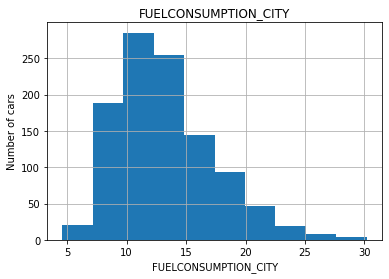

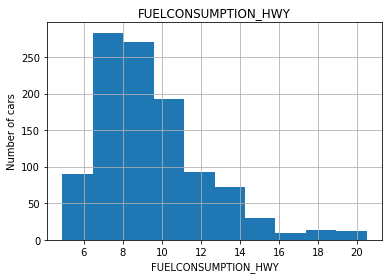

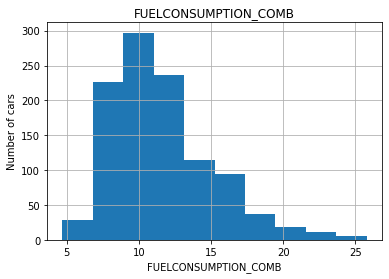

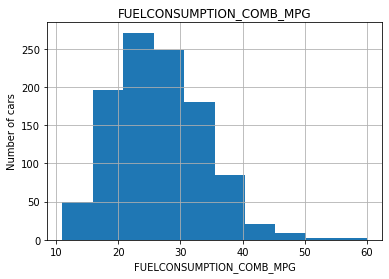

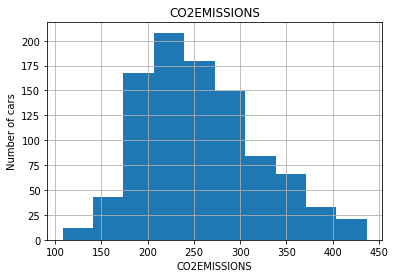

In [17]:
for i, value in dataframe.iteritems():
    if (dataframe[i].dtype != object):
        axarr = dataframe.hist(column=i, sharex=True, sharey=True)
        for ax in axarr.flatten():
            ax.set_xlabel(i)
            ax.set_ylabel("Number of cars")

# 7
One way to optimize the data for machine learning is to normalize them. Data normalization is a common practice in machine learning which consists of transforming numeric columns to a common scale. To normalize the data in each column, we must subtract the mean value and divide the result by standard deviation of that set of data. Using vectorization, we simply treat the entire dataframe like an individual element. However, we do not want to modify and manipulate the index column in this proces; So we store a copy of this column before normalizing the entire dataset and then replace the modified target column with the original one. <br>
Now if we render the yielded dataframe, we can notice a few changes:
1) There are no longer any (inherently) categorial columns present in the frame. <br>
2) The absolute values in every column has now a common scale <br>
3) The index (Unnamed: 0) column is still intact.

In [18]:
first_column_copy = df["Unnamed: 0"]
normalized_df = ((df - df.mean())/df.std())
normalized_df["Unnamed: 0"] = first_column_copy
normalized_df

,Unnamed: 0,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,-0.950214,-1.010949,-0.828169,-0.992876,-0.883890,0.878141,-0.960111
1,1,-0.663149,-1.010949,-0.511193,-0.635031,-0.568305,0.342573,-0.564949
2,2,-1.309046,-1.010949,-1.779098,-1.314936,-1.629817,2.886522,-1.908498
3,3,0.126281,0.113779,-0.145451,-0.134049,-0.137962,-0.192995,NaN
4,4,0.126281,0.113779,-0.291748,-0.277187,-0.281410,0.074789,-0.201401
...,...,...,...,...,...,...,...,...
1062,1062,-0.232551,0.113779,0.025228,0.116442,0.062864,-0.326887,0.225373
1063,1063,-0.089018,0.113779,-0.023537,0.009089,-0.023204,-0.192995,0.114728
1064,1064,-0.232551,0.113779,0.025228,0.116442,0.062864,-0.326887,0.225373
1065,1065,-0.089018,0.113779,-0.096686,-0.062480,-0.080583,-0.192995,0.051502


# 8
In this section, we draw a plot scatter of all the columns, except for index and CO2EMISSION column, with respect to the corresponding CO2 emission. The index has no computational value here since it only represents the number of record so it was not taken into account. <br>
The CO2EMISSIONS-ENGINESIZE plot has a bunch of spots scattered all over the plain. There seem to be very little correlation between the two variables, so we move to next column. <br>
The CO2EMISSION-CYLINDERS plot consists of 7 bars since number of cylinders is a discrete and limited variable, as mentioned before, spots are not distributed across the plain and are only focused in these 7 lines. Here too, seems to be no correlation as no obvious line can be drawn to correlate the two variables. <br>
The CO2EMISSION-FUELCONSUMPTION_CITY and CO2EMISSION-FUELCONSUMPTION_HWY begin to take more the shape of a line instead of seemingly randomly distributed. However, still spots are not perfectly along a certain line. <br>
The CO2EMISSION-FUELCONSUMPTION_COMB consists of a very visible and spot-on line and a smaller line on the side. This plot is showing how the increase in combination of fuel consumption results in a higher CO2 emission and the spots form a clear line. This column is so far the best candidate for linear regression to estimate the missing CO2 emission data. <br>
The CO2EMISSION-FUELCONSUMPTION_COMB_MPG consists of one curve and two smaller curves alongside it. This plot also suggests a negative correlation between the two variables, meaning that the increase in the combination of fuel consumption (miles per gallon) results in a lower CO2 emission. However the correlation not linear like CO2EMISSION-FUELCONSUMPTION_COMB.

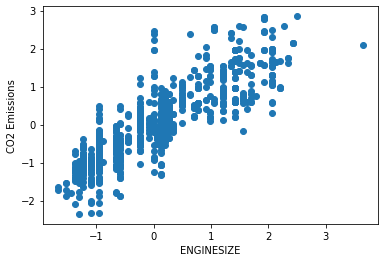

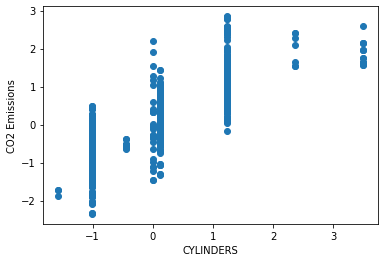

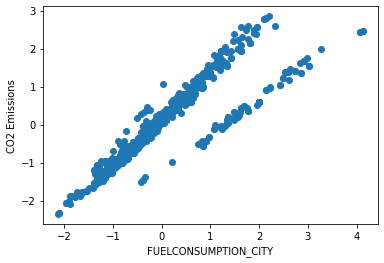

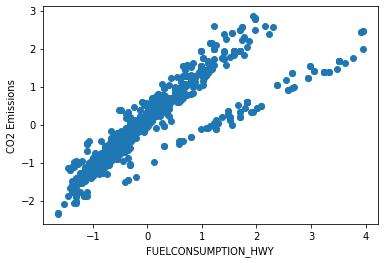

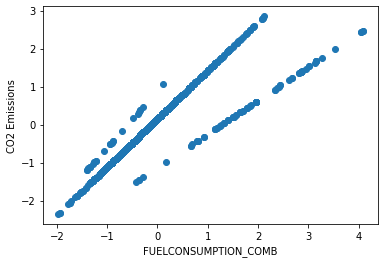

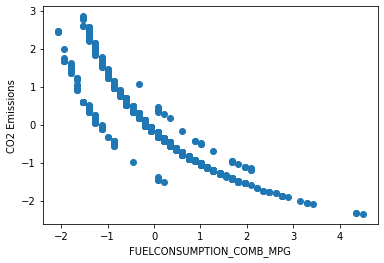

In [19]:
for i, value in normalized_df.iteritems():
    if (i != "CO2EMISSIONS" and i != "Unnamed: 0"):
        plt.scatter(normalized_df[i], normalized_df["CO2EMISSIONS"])
        plt.xlabel(i)
        plt.ylabel("CO2 Emissions")
        plt.show()

Linear regression is a common method to model the relationship between a dependent variable and one or more independent variables. Linear models are developed using the parameters which are estimated from the data. Linear regression is useful in prediction and forecasting where a predictive model is fit to an observed data set of values to determine the response. <br>
In conclusion the FUELCONSUMPTION_COMB is the feature with most linear correlation with CO2 emission and thus will be used in the next sections to fill the missing CO2 emission once the hypothesis function is achieved. What we did here is called feature selection: A process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

# 9
Once we have identified two variables that are correlated, we would like to model this relationship. We want to use one variable as a predictor variable to explain the other variable, the dependent variable. <br>
Now that the feature selection process is over, we copy the index column, selected feature, FUELCONSUMPTION_COMB in our case, and the target column into a new dataframe called 'target_pred'. The content of this dataframe is displayed below, and as expected, it consists of the three aformentioned columns with normalized data. We will use this dataframe in the following sections.

In [20]:
target_pred = normalized_df.filter(["Unnamed: 0", "FUELCONSUMPTION_CITY", "CO2EMISSIONS"], axis = 1)
target_pred

,Unnamed: 0,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,0,-0.828169,-0.960111
1,1,-0.511193,-0.564949
2,2,-1.779098,-1.908498
3,3,-0.145451,NaN
4,4,-0.291748,-0.201401
...,...,...,...
1062,1062,0.025228,0.225373
1063,1063,-0.023537,0.114728
1064,1064,0.025228,0.225373
1065,1065,-0.096686,0.051502


Here we are going to use linear regression to predict the missing data in target column, so our objective here is to find b1 and b0 given by the model: y = b1 * x + b0
b1 and b0 are the slope and y-intercept of the line respectively. Mathematical formula to calculate slope and intercept are given below: <br>
Slope = Sxy/Sxx (Sxy: sample covariance, Sxx: sample variance) <br>
Intercept = ymean – slope* xmean <br>
The result is plotted below. <br>

Slope b1 is: 0.8166751209503406
Intercept b0 is: 1.6845224920507827e-16


Text(0, 0.5, 'CO2EMISSION')

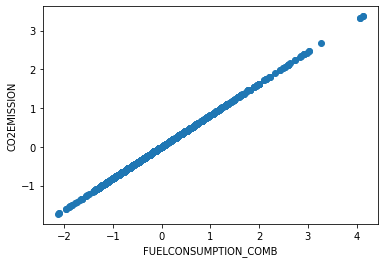

In [21]:
x = target_pred["FUELCONSUMPTION_CITY"]
y = target_pred["CO2EMISSIONS"]
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y) - (np.sum(x)*np.sum(y))/n
Sxx = np.sum(x*x) - (np.sum(x)**2)/n
  
b1 = Sxy/Sxx
b0 = y_mean - b1*x_mean

print("Slope b1 is:", b1)
print("Intercept b0 is:", b0)

y_pred = b1 * x + b0
  
plt.scatter(x, y_pred)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSION")

# 10
Analyze the performance of the model by calculating mean squared error the formula for which is as follows: <br>
SE = <span>&Sigma;</span>(y_pred - y)^2 <br>
MSE = SE / N <br>
Below we calculated the mean squared error of CO2EMISSION by comparing the predicted value with the actual CO2 emissions provided and the error is 0.214. The low value of error signify that the linear regression fits data well.

In [22]:
mse = (np.square(np.subtract(y, y_pred))).mean()
print("Mean Squared Error is:", mse)

Mean Squared Error is: 0.20401948250101404


# 11
The hypothesis function is stored in 'y_pred'. In this section, we mark the y_pred-x and y-x in one plot scatter which are the predicted CO2EMISSIONS as a function of FUELCONSUMPTION_COMB and the actual available CO2EMISSIONS as a function of FUELCONSUMPTION_COMB, respectively. The y_pred-x plot scatter is in an orange color and the other is in blue. In order to prepare a simple regression model of the given dataset, we calculated the slope and intercept of the line which best fits the data points which is the orange line. Linear regression models are often fitted using the least-squares approach where the goal is to minimize the error. In other words, the average of the distances on the blue lines from the target line must be minimum and that's why this line is closer to the denser line than the second, more spread line. 

Text(0, 0.5, 'CO2EMISSION')

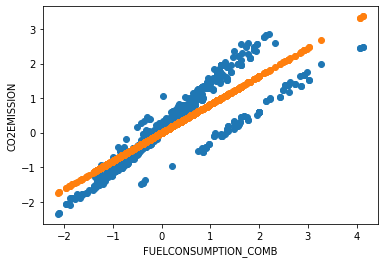

In [23]:
plt.scatter(x,y)
plt.scatter(x, y_pred)
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSION')

# 12
Now after figuring out the hypothesis function in the previous sections, we will use this line to predict the missing CO2EMISSIONS in the missing_df, the dataframe at the end of section 3. This dataframe contains the 103 rows with lost CO2EMISSIONS data. <br>
In the following code block we proceed to copy the input and target column in a new dataframe. Then after normalization we predict the CO2EMISSIONS using input column and denormalize the CO2EMISSIONS to get the original value. 

In [25]:
pred = missing_df[["FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
pred_norm = (pred - pred.mean()) / pred.std()
pred_norm["CO2EMISSIONS"].fillna(pred_norm["FUELCONSUMPTION_COMB"]*b1+b0, inplace=True)
out = pred_norm*df.std() + df.mean()
missing_df["CO2EMISSIONS"] = out["CO2EMISSIONS"]
missing_df

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
3,3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6.000000,AS6,3.0,12.7,9.1,11.1,25,256.676411
20,20,2014,AUDI,A4 QUATTRO,COMPACT,2.0,4.000000,AS8,3.0,11.5,8.1,10.0,28,238.182982
30,30,2014,AUDI,A8,MID-SIZE,3.0,6.000000,AS8,0.0,13.1,8.8,11.2,25,258.357632
42,42,2014,AUDI,Q7,SUV - STANDARD,3.0,5.797677,AS8,3.0,15.1,10.9,13.2,21,291.982048
43,43,2014,AUDI,Q7 TDI CLEAN DIESEL,SUV - STANDARD,3.0,6.000000,AS8,2.0,12.9,8.4,10.9,26,253.313970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,1022,2014,VOLKSWAGEN,BEETLE CONVERTIBLE,SUBCOMPACT,2.0,4.000000,M6,3.0,10.8,7.6,9.4,30,228.095658
1027,1027,2014,VOLKSWAGEN,CC,COMPACT,2.0,4.000000,M6,3.0,11.6,7.7,9.8,29,234.820541
1051,1051,2014,VOLKSWAGEN,TIGUAN,SUV - SMALL,2.0,4.000000,A6,3.0,11.7,9.5,10.7,26,249.951528
1052,1052,2014,VOLKSWAGEN,TIGUAN,SUV - SMALL,2.0,4.000000,M6,3.0,13.6,9.2,11.6,24,265.082515


If we get the number of rows with NaN values in all column as below, all the data has been filled.

In [26]:
missing_df.isnull().sum()

Unnamed: 0                  0
MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

Now, the only thing left to do is to write the target values and the corresponding index column into a csv file.

In [27]:
output = missing_df[["Unnamed: 0", "CO2EMISSIONS"]]
output = output.rename(columns={"Unnamed: 0": "INDEX"})
output.reset_index(drop=True, inplace=True)
print(output["CO2EMISSIONS"].mean())
print(output["CO2EMISSIONS"].mean())
output.to_csv('output.csv')

256.74170124481327


## Areas of improvement
Instead of mean imputation used for filling the NaN cells in section 3, we can use another method called MICE (Multivariate Imputation by Chained Equation). MICE is an imputation method which works by filling the missing data multiple times. Initially, a simple imputation is performed (e.g. mean) to replace the missing data for each variable and we also note their positions in the dataset. Then, we take each feature and predict the missing data with Regression model. The remaining features are used as dependent variables for our Regression model. The process is iterated multiple times which updates the imputation values. The common number of iterations is usually 10, but it depends on the dataset. <br>
To improve the prediction accuracy, we can take several correlated features into account instead of only one. Also, we can encode the categorial columns and incorporate them into these computations as well. That way, more factors are being considered. For example, the vehicle's level of CO2 emissions is linked to the amount of fuel consumed and the type of fuel used and since we dropped the categorial columns altogether, a feature like fuel type is disregarded despite its significance. 

### References:
https://numpy.org <br>
https://realpython.com/numpy-array-programming/ <br>
https://pbpython.com/categorical-encoding.html <br>
https://matplotlib.org/tutorials/introductory/pyplot.html <br>
https://www.geeksforgeeks.org/solving-linear-regression-in-python/